# HyperElipsoid Properties

This is more of a playground file.

Here the random points are plotted.

In [68]:
# to plot outside the notebook:
# %matplotlib qt 

# how to draw inside the notebook:
%matplotlib inline

import random
import scipy.stats as st
import numpy as np
import math
from math import gamma, pi
import time
import scipy
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy.random as rnd

As a summary, we have already said that the equation for the volume of an n-dimensional Elipsoid is:

$$
V\left( x_1, x_2, \dots x_i, \dots x_n \right) = \frac{\pi^{\frac{n}{2}}}{\Gamma \left( \frac{n}{2} + 1 \right)}\prod_{i=1}^{n} x_i
$$

Where The Gamma function is defined as:

$$
\Gamma \left( x \right) = \int\limits_0^\infty {s^{x - 1} e^{ - s} ds}
$$

And the hyperelipsoid is defined as: 

$$
\frac{x_1^2}{r_1^2} + \frac{x_2^2}{r_2^2} + \dots + \frac{x_n^2}{r_n^2} = 1
$$

In [69]:
def getAllSpansEqual(numOfDims, spanForAll):
    return np.ones(numOfDims)*spanForAll

print(getAllSpansEqual(4, 20))

def getRandomUniformSpans(numOfDims, low, high):
    return np.random.rand(numOfDims)*(high-low) + low
    
print( getRandomUniformSpans(4, 10, 60) )

[20. 20. 20. 20.]
[49.80439994 24.41421727 50.85129169 29.52787622]


In [70]:
def getVolumeHypercube(params):
    # vdims = params.size
    # print(dims)
    return np.prod(params)

print(getVolumeHypercube(getAllSpansEqual(4, 20)))

160000.0


In [71]:
def getVolumeElipsoid(params):
    nDims = params.size
    # print(nDims)
    params /= 2
    return pow(pi, (nDims/2)) / gamma(nDims/2 + 1) * np.prod(params)

print(getVolumeElipsoid(getAllSpansEqual(4, 20)))

49348.022005446786


Given the standard definition of the hyperellipsoid, let us define a function determining if a point is inside the body: 

$$
\frac{x_1^2}{r_1^2} + \frac{x_2^2}{r_2^2} + \dots + \frac{x_n^2}{r_n^2} = 
\left( \frac{x_1}{r_1} \right)^2 + \left( \frac{x_2}{r_2} \right)^2 + \dots + \left( \frac{x_n}{r_n} \right)^2 \leq 1
$$

In [72]:
def isInElipsoid(points, elipsoidParameters):
    # points is a d x num_p numpy matrix where d is the number of dimensions and num_p is the number of points.
    # elipsoidParameters is an d-dimensional array, where each element is the RADIUS of the axis.
    d = np.size(elipsoidParameters)
    elipsoidParameters.shape=(d,1) 
    return np.sum(np.square(np.divide(points,elipsoidParameters)),0) <= 1

In [73]:
points = np.array([[1,1.01,0.5,0],[0,0,2,3.01]]) # three points
elipsoidParameters = np.array([1,3])
print(elipsoidParameters)
print(points)
print(isInElipsoid(points, elipsoidParameters))

[1 3]
[[1.   1.01 0.5  0.  ]
 [0.   0.   2.   3.01]]
[ True False  True False]


In [74]:
def visualizeEllipse( ep, points ):
    
    e = Ellipse(xy=[0,0], width=ep[0]*2, height=ep[1]*2, angle=0, edgecolor='b', lw=2, facecolor ='none')

    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')

    ax.add_artist(e)
    e.set_clip_box(ax.bbox)

    dx = ep[0] + 1
    dy = ep[1] + 1
    ax.set_xlim(-dx, dx)
    ax.set_ylim(-dy, dy)
    ax.set_xlabel('X os', fontsize=14)
    ax.set_ylabel('Y os', fontsize=14)
    # ax.grid(True)
    ax.axis('equal')

    plt.scatter(points[0,:], points[1,:])

    plt.show()

In [75]:
def getRandomElipsoid( ep, numPoints ):
    d = np.size(ep)
    ep.shape=(d,1)
    u = np.random.normal(0,1,(d,numPoints))  # an array of d normally distributed random variables
    norm=np.sqrt(np.sum(u**2, axis = 0))
    r = np.random.rand(1,numPoints)**(1.0/d)
    unif_sph = r*u/norm
    
    S = np.diagflat(ep**2)
    T = scipy.linalg.cholesky(S, lower=True)
    return np.dot(T,unif_sph)

# print( getRandomElipsoid(np.array([1,3]), 20) )

In [76]:
def fitEllipsoid1(points, elipsoidParameters):
    d = np.size(elipsoidParameters)
    elipsoidParameters.shape=(d,1)
    max_dist = np.max( np.sum(np.square(np.divide(points,elipsoidParameters)),0) )
    increase_factor = math.sqrt(max_dist)
    new_ellipsoid_parameters = increase_factor*elipsoidParameters
    return new_ellipsoid_parameters
    # Ellipsoid method is much better!! 

In [77]:
points_random = getRandomElipsoid( ep=np.array([3,1]), numPoints=250 )
print(points_random.shape)

(2, 250)


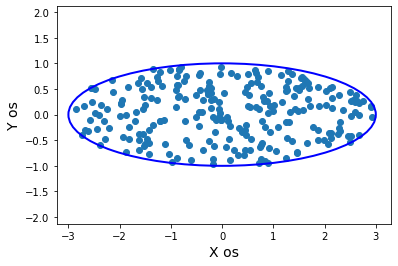

In [78]:
# points = np.array([[1,1.01,0.5,0],[0,0,2,3.01]]) # three points
elipseParameters = np.array([3,1])

visualizeEllipse( elipseParameters, points_random )

In [79]:
points_random = getRandomElipsoid( ep=np.array([4,2,1]), numPoints=500 )
print(points_random.shape)

(3, 500)


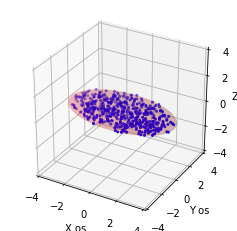

In [81]:
# plot 3d ellipsoid

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')

# coefs = (1/4, 1, 1)  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
# Radii corresponding to the coefficients:
# rx, ry, rz = 1/np.sqrt(coefs)

rx, ry, rz = (4, 2, 1)

# Set of all spherical angles:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))

# Plot:
ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='r',  alpha=0.15)

# Adjustment of the axes, so that they all have the same span:
max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

    

ax.scatter3D( points_random[0,:].T, points_random[1,:].T, points_random[2,:].T, c='blue', s=4 )
ax.set_xlabel('X os')
ax.set_ylabel('Y os')
ax.set_zlabel('Z os')


plt.grid()

plt.show()

In [82]:
# Speed test:
points_random = getRandomElipsoid( ep=getRandomUniformSpans(numOfDims=30, low=1, high=100), numPoints=1000000 )
print(points_random.shape)

# Should not be a problem.

(30, 1000000)
